In [1]:
# Random Forest Model to predict the 'Frailty_Score' of a patient

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from features import target, categories, gait_features, posture_features

In [26]:
# Importing the dataset
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\global_dataset.xlsx'
df = pd.read_excel(file_path)
data = df.copy()


In [27]:
# Drop Foldename column
data = data.drop(columns=['Foldername'])

# Drop the rows that have missing values in 'Frailty_Score' column
data = data.dropna(subset=['Frailty_Score'])

# Drop the columns that have more than 50% of missing values in the dataset
data = data.dropna(thresh=0.5*len(data), axis=1)

In [ ]:
# Use Regression imputation to fill the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create a copy of the data
data_copy = data.copy()

# Create a list of columns that have missing values
cols_with_missing = [col for col in data_copy.columns
                        if data_copy[col].isnull().any()]

# Create a new column to indicate which columns have missing values
for col in cols_with_missing:
    data_copy[col + '_was_missing'] = data_copy[col].isnull()

# Imputation
my_imputer = IterativeImputer()
data_imputed = pd.DataFrame(my_imputer.fit_transform(data_copy))
data_imputed.columns = data_copy.columns

# Check if there are any missing values
data_imputed.isnull().sum()

In [12]:
# Splitting the dataset into the Training set and Test set
X = data_imputed.iloc[:, :-1].values
y = data_imputed.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [13]:
# Training the model
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [15]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score: ', r2)



Mean Squared Error:  0.013620000000000002
Root Mean Squared Error:  0.11670475568716128
R2 Score:  0.0


In [16]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5)
print('Mean Accuracy: ', accuracies.mean())
print('Standard Deviation: ', accuracies.std())


Mean Accuracy:  0.6294417582417582
Standard Deviation:  0.3428034654480577


In [17]:
# Applying Grid Search to find the best model and the best parameters
parameters = [{'n_estimators': [5, 10, 50, 100]}]
grid_search = GridSearchCV(estimator = regressor,
                            param_grid = parameters,
                            scoring = 'r2',
                            cv = 5,
                            n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: ', best_accuracy)
print('Best Parameters: ', best_parameters)



Best Accuracy:  0.8748021978021978
Best Parameters:  {'n_estimators': 10}


In [18]:
# Applying Randomized Search to find the best model and the best parameters
parameters = [{'n_estimators': [5, 10, 50, 100]}]
random_search = RandomizedSearchCV(estimator = regressor,
                                    param_distributions = parameters,
                                    scoring = 'r2',
                                    cv = 5,
                                    n_jobs = -1)
random_search = random_search.fit(X_train, y_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print('Best Accuracy: ', best_accuracy)
print('Best Parameters: ', best_parameters)




c:\Users\matth\Anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Accuracy:  0.8053626373626374
Best Parameters:  {'n_estimators': 5}


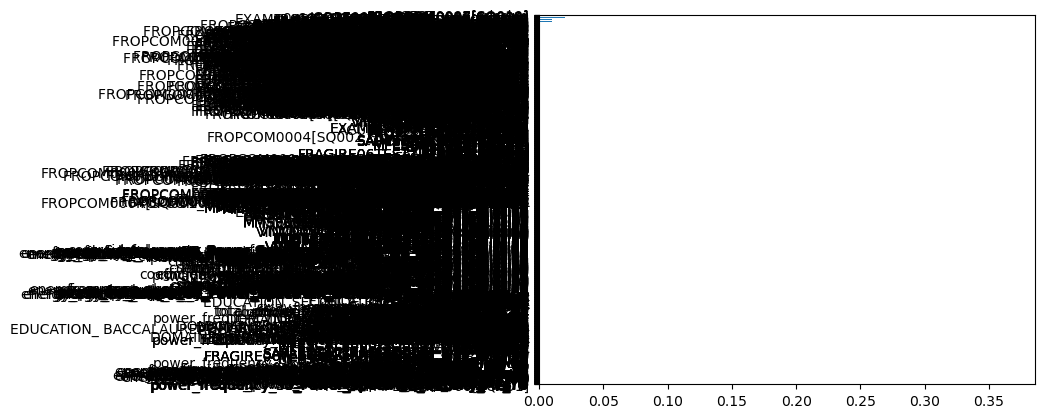

In [19]:
# Get feature importances
importances = regressor.feature_importances_

# Map importances to feature names
feature_importances = pd.Series(importances, index=data_imputed.columns[:-1])

# Sort and plot
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh')
plt.show()
